In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Local imports
!pip install zat
import zat
from zat.log_to_dataframe import LogToDataFrame
from zat.dataframe_to_matrix import DataFrameToMatrix

# Printing versions
print('zat: {:s}'.format(zat.__version__))
print('Numpy: {:s}'.format(np.__version__))


     |████████████████████████████████| 184kB 5.8MB/s 
     |████████████████████████████████| 204.2MB 67kB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 204kB 35.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=2c1b3724d8cbc0f9346c37cfa5e5fd6984d86065a9e17c5cfa6ba1bdc38cbc31
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
zat: 0.4.1
Numpy: 1.19.5


## Quickly go from Zeek log to Pandas DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a Pandas dataframe from a Zeek log
log_to_df = LogToDataFrame()
zeek_df = log_to_df.create_dataframe('/content/drive/MyDrive/Universita/Magistrale/Tesi/ZeekML/Logs/iso_cotp.log')

# Print out the head of the dataframe

zeek_df.tail()


,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,pdu_type
ts,,,,,,
2021-02-05 02:17:32.414690018,Cp7gqA4cyzIhKB1eke,167.248.133.39,33920,192.168.1.4,102,Data
2021-02-05 02:17:32.565212011,Cp7gqA4cyzIhKB1eke,167.248.133.39,33920,192.168.1.4,102,Data
2021-02-05 02:17:32.565466881,Cp7gqA4cyzIhKB1eke,167.248.133.39,33920,192.168.1.4,102,Data
2021-02-05 02:17:32.717113972,Cp7gqA4cyzIhKB1eke,167.248.133.39,33920,192.168.1.4,102,Data
2021-02-05 02:17:32.717433929,Cp7gqA4cyzIhKB1eke,167.248.133.39,33920,192.168.1.4,102,Data



Plottiamo il numero di ocorrenze per tipo di funzione invocata

https://github.com/amzn/zeek-plugin-s7comm/blob/master/scripts/consts.zeek

Sezione const cotp_types

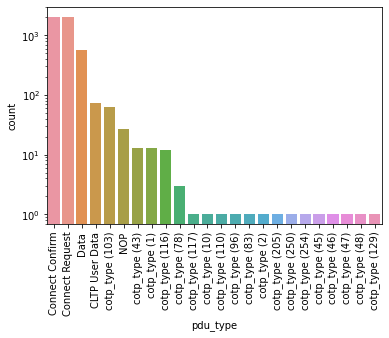

In [ ]:
#print(zeek_df['pdu_type'].value_counts())
#zeek_df['pdu_type'].value_counts().plot.bar()

import seaborn
#plt.hist(zeek_df['pdu_type'], log=True) 

s7_fc_plot= seaborn.countplot(data=zeek_df, x='pdu_type', order=zeek_df.pdu_type.value_counts().index)
s7_fc_plot.set(yscale="log")
plt.xticks(rotation=90)
plt.show()



#S7comm COTP requests in Latex

In [ ]:
print(zeek_df['pdu_type'].value_counts().to_latex())

\begin{tabular}{lr}
\toprule
{} &  pdu\_type \\
\midrule
Connect Confirm &      2056 \\
Connect Request &      2056 \\
Data            &       564 \\
CLTP User Data  &        73 \\
cotp\_type (103) &        62 \\
NOP             &        27 \\
cotp\_type (43)  &        13 \\
cotp\_type (1)   &        13 \\
cotp\_type (116) &        12 \\
cotp\_type (78)  &         3 \\
cotp\_type (117) &         1 \\
cotp\_type (10)  &         1 \\
cotp\_type (110) &         1 \\
cotp\_type (96)  &         1 \\
cotp\_type (83)  &         1 \\
cotp\_type (2)   &         1 \\
cotp\_type (205) &         1 \\
cotp\_type (250) &         1 \\
cotp\_type (254) &         1 \\
cotp\_type (45)  &         1 \\
cotp\_type (46)  &         1 \\
cotp\_type (47)  &         1 \\
cotp\_type (48)  &         1 \\
cotp\_type (129) &         1 \\
\bottomrule
\end{tabular}



## Looking for Country


Deleting rows that include local IP address



In [ ]:
zeek_df = zeek_df[~zeek_df['id.orig_h'].isin(['192.168.1.7'])]

     |████████████████████████████████| 26.1MB 180kB/s 
     |████████████████████████████████| 286kB 44.3MB/s 
  Created wheel for maxminddb-geolite2: filename=maxminddb_geolite2-2018.703-cp36-none-any.whl size=26407039 sha256=392186c9e6f165c6abe854c44ab29d218070b140fec0282d5fe3c6b734a4bc3b
  Stored in directory: /root/.cache/pip/wheels/94/69/0a/4453d83e882e2c55aa8c8b5b37342e0b4acddb92e808fa9664
  Created wheel for maxminddb: filename=maxminddb-2.0.3-py2.py3-none-any.whl size=15284 sha256=2b51a2422c98563c7cf580903b569c79ef3657cb9790628a856b2f055d8a6044
  Stored in directory: /root/.cache/pip/wheels/55/0e/56/d16e8c8c19aced8bbd51b3e40f84208f023f9a90328c6b450f
Successfully built maxminddb-geolite2 maxminddb
     |████████████████████████████████| 61kB 3.3MB/s 
89.248.165.81      3872
27.122.12.247        68
27.122.12.232        54
139.162.99.243       48
178.73.215.171       40
                   ... 
192.241.206.247       1
192.241.206.240       1
192.241.195.46        1
192.241.221.72 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AttributeError: ignored

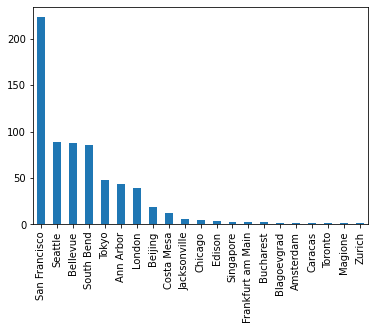

In [ ]:
!pip install maxminddb-geolite2
!pip install pygeoip  
!pip install tikzplotlib
import tikzplotlib

import seaborn
import pandas as pd
from geolite2 import geolite2

def get_city(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['city']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()




# get unique IPs
unique_ips = zeek_df['id.orig_h'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> city
print(zeek_df['id.orig_h'].value_counts())

zeek_df['city'] = zeek_df['id.orig_h'].map(unique_ips.apply(get_city))

#print(zeek_df['city'])


#plot logarithmic
zeek_df['city'].value_counts().plot.bar()


actors_plot = seaborn.countplot(data=zeek_df, x='city', order=zeek_df.country.value_counts().index)
plt.xticks(rotation=90)
plt.show()
#geolite2.close()



##Looking for DNS (vedi distro ip Zanero)


In [ ]:
!pip install dnspython
from dns import resolver,reversename
import dns.exception

def get_dns(ip):
    try:
        return str(resolver.query(reversename.from_address(ip), 'PTR')[0])
    except dns.exception.DNSException:
        return pd.np.nan

unique_ips = zeek_df['id.orig_h'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
print(zeek_df['id.orig_h'])

zeek_df['dns'] = zeek_df['id.orig_h'].map(unique_ips.apply(get_dns))

print(zeek_df['dns'].value_counts())


#zeek_df['dns'].value_counts().plot.bar()




     |████████████████████████████████| 245kB 4.8MB/s 
ts
2021-01-04 18:37:55.898025990      82.53.128.61
2021-01-04 19:24:14.342796087      71.6.167.124
2021-01-04 19:24:14.343363047      71.6.167.124
2021-01-04 19:24:14.534172058      71.6.167.124
2021-01-04 19:24:14.534384011      71.6.167.124
                                      ...      
2021-02-05 02:17:32.414690018    167.248.133.39
2021-02-05 02:17:32.565212011    167.248.133.39
2021-02-05 02:17:32.565466881    167.248.133.39
2021-02-05 02:17:32.717113972    167.248.133.39
2021-02-05 02:17:32.717433929    167.248.133.39
Name: id.orig_h, Length: 4887, dtype: category
Categories (123, object): ['128.199.5.111', '138.197.148.52', '139.162.99.243', '139.219.13.13', ...,
                           '89.47.62.108', '91.241.19.60', '93.174.95.106', '95.211.230.211']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: please use dns.resolver.resolve() instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':


scanner-07.ch1.censys-scanner.com.            56
scanner-04.ch1.censys-scanner.com.            48
scan-42.security.ipip.net.                    48
scanner-09.ch1.censys-scanner.com.            48
178-73-215-171-static.glesys.net.             40
                                              ..
host-82-53-128-61.retail.telecomitalia.it.     1
zg-1218a-208.stretchoid.com.                   1
zg-1218a-22.stretchoid.com.                    1
zg-1218a-215.stretchoid.com.                   1
zg-1218a-141.stretchoid.com.                   1
Name: dns, Length: 75, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##Number of connections per actor (unique). (remove 

 A handful of actors generates the majority of the ICS traffic.

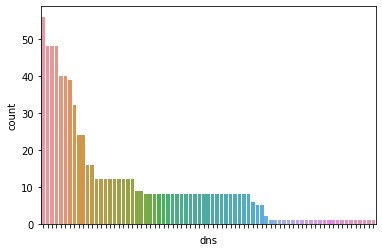

In [ ]:

actors_plot = seaborn.countplot(data=zeek_df, x='dns', order=zeek_df.dns.value_counts().index)
actors_plot.set(xticklabels=[]) 
plt.show()

##Looking for ASN and Organization




In [ ]:
!pip install geoip2

import geoip2.database

#Upload maxmind geoasn then put to drive

#Generic exception, no asnexception found


def get_asn(ip):
  try:
    with geoip2.database.Reader('/content/drive/MyDrive/Universita/Magistrale/Tesi/DBs/GeoLite2-ASN.mmdb') as reader:
      response = reader.asn(ip)
      #print(response.autonomous_system_number)
      #print(response.autonomous_system_organization)
      return response.autonomous_system_number
  except:
    return pd.np.nan


def get_org(ip):
  try:
    with geoip2.database.Reader('/content/drive/MyDrive/Universita/Magistrale/Tesi/DBs/GeoLite2-ASN.mmdb') as reader:
      response = reader.asn(ip)
      #print(response.autonomous_system_organization)
      return response.autonomous_system_organization
  except:
    return pd.np.nan

unique_ips = zeek_df['id.orig_h'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)


zeek_df['asn'] = zeek_df['id.orig_h'].map(unique_ips.apply(get_asn))

zeek_df['org'] = zeek_df['id.orig_h'].map(unique_ips.apply(get_org))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##Top10 s7comm Addresses



In [ ]:
zeek_df[['id.orig_h','dns','asn','org']].value_counts().head(10)

#Latex: zeek_df[['id.orig_h','dns','asn','org']].value_counts().head(10).to_latex()

id.orig_h       dns                                  asn       org           
139.162.99.243  scan-42.security.ipip.net.           63949.0   Linode, LLC       48
178.73.215.171  178-73-215-171-static.glesys.net.    42708.0   GleSYS AB         40
178.79.129.208  178.79.129.208.li.binaryedge.ninja.  63949.0   Linode, LLC       39
74.120.14.53    scanner-07.ch1.censys-scanner.com.   398705.0  CENSYS-ARIN-02    32
162.142.125.38  scanner-04.ch1.censys-scanner.com.   398324.0  CENSYS-ARIN-01    24
89.248.174.3    security.criminalip.com.             202425.0  IP Volume inc     24
192.35.168.160  worker-10.sfj.censys-scanner.com.    237.0     MERIT-AS-14       16
162.142.125.39  scanner-04.ch1.censys-scanner.com.   398324.0  CENSYS-ARIN-01    16
162.142.125.56  scanner-05.ch1.censys-scanner.com.   398324.0  CENSYS-ARIN-01    16
167.248.133.40  scanner-08.ch1.censys-scanner.com.   398722.0  CENSYS-ARIN-03    16
dtype: int64

##Check ASN Reputation